# I/O, modules, NumPy, Matplotlib

Today we'll first look at file I/O and the `with` keyword, which you've seen in passing but which I haven't talked about yet.

And then, we will finally have a look at some of the powerful modules that extend Python and make it such a powerful tool for data science, namely NumPy and Matplotlib.

## File I/O and `with`

Python offers built-in functions `open` and `close` that allow low level access to files, allowing you to read and write strings or binary data. The structure is as follows:

- The call to `open` yields an object that is called a "file handle", that serves as an access point to file operations.
- You can open a file in several different modes; see the table below.
- Your program does what it wants to do with the file using its handle.
- When you're done, you have to `close` the file handle to free up system resources and let the system know that the file is not in use.


```
handle = open(<filename>, <mode>)
```

Modes:

| mode        | meaning                                |
| ----------- | -------------------------------------- |
| `r`/`w`/`+` | read/write/update (`r` can be omitted) |
| `t`/`b`     | text/binary (`t` can be omitted)       |
| `a`         | append                                 |
| `x`         | check that file did not exist before   |

Here is a demo:

In [ ]:
handle = open('dorian_gray.txt', 'r')
data = handle.read() # get all data from the file as a string
handle.close() # done with the file - why not close it immediately

# do stuff with the data we read:
words = data.split() # split the string into words
len(words)

We used the method `read` on the filehandle to read all the data in the file.

It's also often convenient to read the file line by line. This can be done with the `readline` function. Readline returns one line of text from the file, *including* the newline character `'\n'` at the end. If there are no more lines in the file, `readline` returns the empty string, so it can be used in a `while` loop.

The code above works fine, but there is one drawback: if an error should occur in your program *while the file is open*, then it might never get closed again. The `with` keyword is intended to make sure that you don't have to remember to close the file, and you also don't need to worry about errors. It looks like this:

```
with <contentmanager> as <variablename>:
    # do stuff with variablename.
```

Remember classes and custom types from last week? A *content manager* is an object that supports a method `__enter__` that performs initialisation of the content, and provides it to the user, and a method `__exit__` that wraps up the content if necessary.

- You will never have to worry about writing content managers.

- But conveniently, **a file handle is a content manager**, and it's `__exit__` method will close the file for you.

So, let's rewrite the code above using `with`:

In [ ]:
import os
os.getcwd()

In [ ]:
# in : a file name referring to a text file
# out: a list containing all the words in that file
def readwords(filename):
    with open(filename, 'r') as handle:
        data = handle.read() # get all data from the file as a string
    return data.split()

# do stuff with the data we read:
words = readwords('dorian_gray.txt')

len(words)    

## Important topics not covered in this course:

- Recursion: functions calling themselves
- Lambda expressions with `lambda`
- Rolling your own generators with `yield`
- In-depth object oriented programming
- More details about the Python type hierarchy
- Error handling with `try`, `except`, `finally` and `raise`

See the [Python tutorial](https://docs.python.org/3/tutorial/index.html) if you want to learn more about topics we are skipping in this class!

## Modules and `import`

A module is a Python program that is intended to be used to write other Python programs. There are many Python modules that we will talk about from this lecture onwards. A lot of those modules are part of the Python standard library:

- **Math**: supports numerical constants and operations like `sin`, `log`, etc.
- **Random**: a module for random number generation
- **Pickle**: a module for saving Python objects to a file or transmitting them over the network.

But there are also modules distributed by other parties, and some of these are very sophisticated:

- **NumPy**: a module that supports efficient linear algebra and other numerical methods
- **Matplotlib**: a module for making graphs and charts.
- **Pandas**: a module for working with R-style data frames
- **ScikitLearn**: a module that contains many machine learning algorithms

Modules work a lot like class objects: you load a module by using

```
import <modulename>
```

and this makes available any number of functions and variables that can be accessed through the module name, with a dot, just like accessing variables within objects of a class.

If `<modulename>` is very long and you don't want to have to type it in all the time, you can rename it using:

```
import <modulename> as <alias>
```
If this is still too much typing, you can use a slightly different syntax that allows you to import those variables or functions into the global namespace directly:

```
from <modulename> import <name>, <name>, ...
```

## `math` module

In [1]:
import math

math.pi, math.sqrt(2), math.exp(1), math.atan2(0,-1)

(3.141592653589793, 1.4142135623730951, 2.718281828459045, 3.141592653589793)

In [2]:
from math import pi, sqrt, exp, atan2

pi, sqrt(2), exp(1), atan2(0,-1)

(3.141592653589793, 1.4142135623730951, 2.718281828459045, 3.141592653589793)

In [3]:
# Better not to use this:
from math import *

cos(10)

-0.8390715290764524

For more information about mathematical operations supported by the math module, look [over here](https://docs.python.org/3/library/math.html).



## `random` module

You've seen that there's also a module called `random`, [documented here](https://docs.python.org/3/library/random.html), that allows you to generate random numbers; more sophisticated random number generation and mathematical functions are included in NumPy though so we will skip them this time.

## `pickle` module

With the `pickle` module you can load and save Python objects, or transmit them over the network to another computer. To use pickle, import the module and acquire a file handle with `with` as before. (Add the "b" specifier to open as a binary file rather than a text file.) Then call the appropriate pickle function, `dump` or `load`.

In [ ]:
import pickle

# first create a Python object that we will then try to save with pickle.

def f(arg):
    return("Hello world! My argument is", arg)
    
with open("demo.pickle", "wb") as fh:
    print("Saving the function 'f'")
    pickle.dump(f, fh)
    
    print("Saving a string")
    pickle.dump("Rick!", fh)
    
# now let's load these objects back into memory, and check that we did recover them.

with open("demo.pickle", "rb") as fh:
    print("Loading first object.")
    f2 = pickle.load(fh)
    print("Calling function:", f2("here is an argument"))
    print("Loading string:", pickle.load(fh))
    

You can also use pickle to send Python objects over the network.

# NumPy

There is a module in the Python standard library called `array`, which allows construction of "homogeneous" arrays that have an efficient representation in memory. A homogeneous array contains values of only a single type. (Atomic vectors in R are also homogeneous.)

The functionality of Python arrays is rather limited though if you want to do data analysis.

Thanks to the good people in the open source community, we can switch to `NumPy`, which provides a more full featured alternative that supports many methods from linear algebra, with really fast implementations.

In [4]:
import numpy as np

### ndarray: construction
The basic `NumPy` type is the `ndarray`. One way to construct it is from a Python list or tuple, or a list/tuple of list/tuples.

In [5]:
# Create a single dimensional array from a list or tuple.
np.array(["hello", 3])

array(['hello', '3'], dtype='<U5')

Note that all arguments are converted to a single type, in this case <U5.
Every `numpy` object has a `dtype`. It is usually inferred automatically, but you can also specify it explicitly.

In [6]:
np.array( [ [1,2], [3,4] ], dtype=complex )

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [7]:
# Here is a three dimensional array:
np.array( [[[1,2],[3,4]], [[5,6],[7,8]], [[9,10],[11,12]]] )

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

You can also create arrays of a given size without immediately filling it with data from regular Python objects. The fastest way to construct an array is using `empty`, which does not initialise the entries at all: the values are defined what happens to be present in the computer memory at the time. So make sure to initialise it properly later before you use any of these values!

In [8]:
# warning! This may yield random junk!
np.empty([15, 3])

array([[ 1.28822975e-231,  2.00389758e+000,  2.17202149e-314],
       [ 2.47032823e-323,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  3.03096139e-205,  0.00000000e+000],
       [ 0.00000000e+000, -1.33567300e-233,  0.00000000e+000],
       [ 0.00000000e+000, -6.58549466e+001,  0.00000000e+000],
       [ 0.00000000e+000,  3.69412294e-205,  0.00000000e+000],
       [ 0.00000000e+000, -1.36791218e+097,  0.00000000e+000],
       [ 0.00000000e+000,  7.35379166e+142,  0.00000000e+000],
       [ 0.00000000e+000, -5.74644095e-256,  0.00000000e+000],
       [ 1.94693963e-308,  0.00000000e+000,  3.95252517e-323],
       [ 2.17205299e-314,  2.47032823e-323,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  1.07958837e-249],
       [ 0.00000000e+000,  0.00000000e+000,  1.27812179e+254],
       [ 0.00000000e+000,  0.00000000e+000,  3.55251543e-276],
       [ 0.00000000e+000,  0.00000000e+000, -2.81366582e+084]])

It is also often convenient to initialise `ndarray`s with zeros or ones.

In [9]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

Note that they are initialised by default to some floating point type: let's find out which it is:

In [10]:
np.zeros([2,3]).dtype

dtype('float64')

But, as before you can explicitly specify a different data type:

In [11]:
np.ones([3,2], dtype=np.int32)

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

Finally, there is an analogue of the `range` function, called `arange`, that constructs single dimensional arrays, and a related method called `linspace` in which you provide the number of steps rather than the stepsize.

In [12]:
# go from 0 to 10 (excluding 10 itself) in steps of 3
np.arange(0,10,3)

array([0, 3, 6, 9])

In [13]:
# go from 0 to 10 in 3 steps
np.linspace(0,10,3)

array([ 0.,  5., 10.])

### Properties of ndarrays

We've seen that ndarrays have a specific data type. In fact, they have several other properties as well:

In [14]:
a = np.array([(1,7,3),(4,4,2)])
print(a)
print("ndim    :", a.ndim)     # number of dimensions
print("shape   :", a.shape)    # the size in each dimension, like "dim" in R
print("size    :", a.size)     # the total number of entries
print("dtype   :", a.dtype)    # the data type of the entry
print("itemsize:", a.itemsize) # number of bytes used per entry
print("data    :", a.data)     # the raw data (don't use directly)

[[1 7 3]
 [4 4 2]]
ndim    : 2
shape   : (2, 3)
size    : 6
dtype   : int64
itemsize: 8
data    : <memory at 0x10efe4dc8>


### Reshaping, joining and splitting arrays

Like in R, changing the `shape` field changes the interpretation of the data in the matrix:

In [15]:
print("Normal a:\n",a)
a.shape = (3,2)
print("Shape changed:\n", a)
a.shape = (2,3)

Normal a:
 [[1 7 3]
 [4 4 2]]
Shape changed:
 [[1 7]
 [3 4]
 [4 2]]


This triggers my curiosity. Recall that `ndarray` objects have an `ndim` property. What happens to `ndim` if I set the shape to reflect a different number of dimensions?

In [16]:
oldshape = a.shape
print("Normal ndim:", a.ndim)
a.shape = 6
print("Shape changed. Array is now", a, "; ndim is now", a.ndim)
a.shape=oldshape

Normal ndim: 2
Shape changed. Array is now [1 7 3 4 4 2] ; ndim is now 1


In [17]:
a

array([[1, 7, 3],
       [4, 4, 2]])

So changing the shape may have other consequences to the object as well! Apparently it's not just assignment to a field in the object: the default behaviour of the assignment operator has been changed by the library. That's good to know, because it means that we cannot inadvertently put the object in an inconsistent state.

It's often more convenient to change the shape using the `reshape` method, because it does less confusing magic under the hood, and it leaves the original object `a` intact:

In [18]:
b = a.reshape(3,2)
print(b)
print("Shape of b is", b.shape)
print("Shape of a should not have changed:", a.shape)

[[1 7]
 [3 4]
 [4 2]]
Shape of b is (3, 2)
Shape of a should not have changed: (2, 3)


Note that `reshape` only creates a new "view" of *the same* underlying data. So the `data` field of `b` and `a` is the same! More about views later.

In [19]:
print(a[0,0])
print(b[0,0])
b[0,0] = 123
print(a)

1
1
[[123   7   3]
 [  4   4   2]]


In R, one can concatenate matrices using `rbind` and `cbind`; in Python the same can be achieved using `vstack` and `hstack`:

In [20]:
qw = np.vstack((a,a,a))
a[0,0]=-23058234
print(qw)

[[123   7   3]
 [  4   4   2]
 [123   7   3]
 [  4   4   2]
 [123   7   3]
 [  4   4   2]]


To split an array, there are `hsplit` and `vsplit`:

In [21]:
print(a)
np.hsplit(a,3) # split into 3 chunks

[[-23058234         7         3]
 [        4         4         2]]


[array([[-23058234],
        [        4]]), array([[7],
        [4]]), array([[3],
        [2]])]

### Indexing and iterating

You can index an ndarray the same way you can index a list; if the ndarray is multidimensional you specify the ranges for each dimension in turn, separated by commas:

In [22]:
a[:,1:]

array([[7, 3],
       [4, 2]])

An `ndarray` is `Iterable`, so can be used in a `for`-loop; it will iterate over the first dimension (the rows):

In [24]:
a

array([[-23058234,         7,         3],
       [        4,         4,         2]])

In [23]:
for row in a:
    print("Here is a row:", row)

Here is a row: [-23058234         7         3]
Here is a row: [4 4 2]


If you want to iterate over all items in the array, the `flat` field contains an iterator over all entries:

In [25]:
for entry in a.flat:
    print("Entry: ", entry)

Entry:  -23058234
Entry:  7
Entry:  3
Entry:  4
Entry:  4
Entry:  2


To loop over the columns of the matrix, use the transpose of the matrix, which is available as the `T` field:

In [26]:
for col in a.T:
    print("Here is a column: ", col)

Here is a column:  [-23058234         4]
Here is a column:  [7 4]
Here is a column:  [3 2]


### Functions and operators that operate on each array entry

Like in R, regular mathematical operators are applied to each entry individually:

In [27]:
a[0,0]=1
b = np.arange(a.size).reshape(a.shape)
print("a:\n", a, "\nb:\n", b)
print("a+b:\n", a+b)
print("a+1:\n", a+1)
print("a*b:\n", a*b)
print("a*3:\n", a*3)

a:
 [[1 7 3]
 [4 4 2]] 
b:
 [[0 1 2]
 [3 4 5]]
a+b:
 [[1 8 5]
 [7 8 7]]
a+1:
 [[2 8 4]
 [5 5 3]]
a*b:
 [[ 0  7  6]
 [12 16 10]]
a*3:
 [[ 3 21  9]
 [12 12  6]]


There are also lots of useful functions that work on each entry individually. (These are called "universal functions") Here are a bunch of examples:

In [30]:
b = np.arange(7,0,-2) # like range(), but for arrays
print("b =", b)

print("np.exp(b)= ", np.exp(b))
print("np.exp2(b)=", np.exp2(b))
print("np.log(b)= ", np.log(b))
print("np.log2(b)=", np.log2(b))
print("np.sin(b)= ", np.sin(b))
print("np.sqrt(b)=", np.sqrt(b))

b = [7 5 3 1]
np.exp(b)=  [1096.63315843  148.4131591    20.08553692    2.71828183]
np.exp2(b)= [128.  32.   8.   2.]
np.log(b)=  [1.94591015 1.60943791 1.09861229 0.        ]
np.log2(b)= [2.80735492 2.32192809 1.5849625  0.        ]
np.sin(b)=  [ 0.6569866  -0.95892427  0.14112001  0.84147098]
np.sqrt(b)= [2.64575131 2.23606798 1.73205081 1.        ]


### Functions that operate on matrices or vectors as a whole

In [31]:
print("b =",b)
print("sum(b)=   ", np.sum(b))
print("min(b)=   ", np.min(b))
print("max(b)=   ", np.max(b))
print("median(b)=", np.median(b))
print("mean(b)=  ", np.mean(b))
print("var(b)=   ", np.var(b))
print("sort(b)=  ", np.sort(b))

b = [7 5 3 1]
sum(b)=    16
min(b)=    1
max(b)=    7
median(b)= 4.0
mean(b)=   4.0
var(b)=    5.0
sort(b)=   [1 3 5 7]


### Linear algebra

`NumPy` contains many common linear algebra operations and algorithms. For a complete reference, see [the NumPy documentation](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html), but here are some examples:

In [32]:
# matrix product
np.dot(a,a.T)

array([[59, 38],
       [38, 36]])

In [ ]:
# invert the matrix
b = np.array([[1,3],[2,5]])
np.linalg.inv(b)

In [ ]:
# compute the determinant
np.linalg.det(b)

In [ ]:
# transpose
a.T

### Views

In some object oriented designs, and certainly in `NumPy`, it is possible that you are offered access to some data not through one object, but through a whole bunch of objects. Multiple objects providing access to the same underlying data are called *views* on the data. Many of the methods and functions that we've considered (such as `reshape` and `transpose`, as well as extracting rows or columns through indexing) actually yield a different view of the same underlying data.

It is important to realise that `ndarray`s are **mutable**, and that views rely on **references**, as I talked about in lecture 3. So if you change the data through one view, you will see the change in the other view!

The advantage of views is that they are lightweight: if you have a huge matrix, producing a different view of the matrix does not require copying all the data. It only involves creating a new matrix object, with the `data` field referencing the same huge matrix in memory. In the new data object, the `shape` can be set differently, and the axes can be reordered.

The following experiment shows that the matrix `a` and its transpose use the same underlying data: the transpose is a *view* of the same data, not a transposed copy. The same logic applies to the `reshape` and `ravel` methods.

In [33]:
print("a:\n", a)
a.T[0,1] = 5
print("a after change:\n", a)
a[1,0] = 4

a:
 [[1 7 3]
 [4 4 2]]
a after change:
 [[1 7 3]
 [5 4 2]]


# Matplotlib

Matplotlib is an extensive plotting library for Python. It consists of a number of components:
- Matplotlib API: the "front end" of the package, providing numerous primitives to create plots.
- Renderers: modules that know how to draw to different devices or file types, such as postscript, svg, png, etcetera
- PyPlot: a Matlab-like plotting interface.

You will mostly use matplotlib via PyPlot. (There is also a thing called PyLab, which is the same as PyPlot but includes NumPy in the same namespace. It is cleaner to use these two modules in their own namespace, so we will not use PyLab.)

To gain access to PyPlot, it is customary to import it like this:

In [34]:
import matplotlib.pyplot as plt

One of the most common use cases is to graph a bunch of $(x,y)$ coordinate pairs:

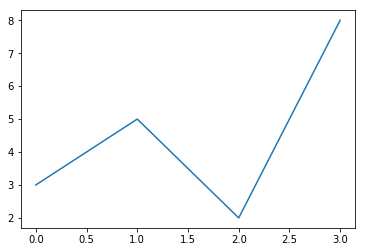

Resumed


In [35]:
plt.plot(range(4),[3,5,2,8])
plt.show()
print("Resumed")

The `plot` function will generate the plot, and `show` will display it on the default output device, and block (suspend execution) until the output device is done. In my Python installation, a separate window containing the plot turns up, and execution resumes once the window is closed.

Most of the time, it's nicer to embed the plot output in the Jupyter notebook. That can be arranged by entering the following line. (This is not part of Python, but interpreted by Jupyter as a special command.)

In [36]:
%matplotlib inline

After that, the default output device becomes the notebook itself. It does not block: output is immediately rendered and Python proceeds to execute code. Still, it's important to call `show` to signal that the plot is complete and that no more embellishments need to be drawn.

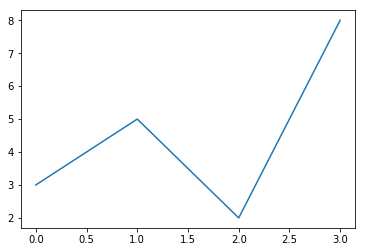

Resumed


In [37]:
plt.plot(range(4),[3,5,2,8])
plt.show()
print("Resumed")

Note that in this case, the $x$-coordinates of the points are not particularly exciting. If it's simply `range(len(y))`, it can be omitted. Also, instead of a line plot, we can select the point and line styles with an additional string argument. Here is an example, see online for more details: there are a *lot* of available marker and line properties.

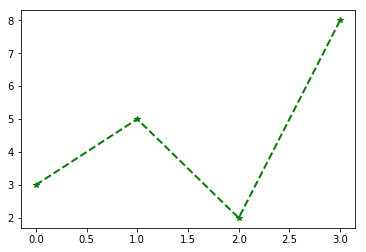

In [38]:
plt.plot([3,5,2,8], marker='*', linestyle='--', linewidth=2, color='g')
plt.show()

The supplied coordinates can describe any two dimensional path; sometimes it's better to suppress lines lines altogether and use only markers to get a scatterplot. We can also specify the ranges of the axes and add labels and a legend.

In [39]:
import numpy as np
np.random.randn(10)

array([ 0.49120973, -1.42591276, -0.48525139, -1.10022146,  0.21487226,
        0.27186567, -0.25418508,  0.46782747,  0.36224096,  0.66458896])

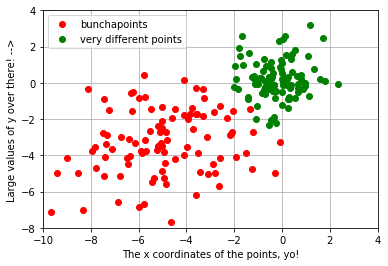

In [40]:
xs  = np.random.randn(100)*2-5
ys  = np.random.randn(100)*2-3
xs2 = np.random.randn(100)
ys2 = np.random.randn(100)

# add labels to the datasets
plt.plot(xs, ys,           color='r', marker='o', 
         linestyle='None', label='bunchapoints')
plt.plot(xs2, ys2,          color='g', marker='o',
         linestyle='None', label='very different points')

# change the axis limits using axis() 
# - axis('off') disables the axes altogether
# - can also use xlim, ylim to set the axes individually
plt.axis([-10,4,-8,4])

# change the vertical axis tick marks to only include even numbers
plt.yticks(np.arange(-8,6,2))

# add grid lines
plt.grid(True)

# add labels to the axes
plt.xlabel("The x coordinates of the points, yo!")
plt.ylabel("Large values of y over there! -->")

# add a legend listing the labels of the data sets
plt.legend()

plt.show()

If you want to plot data on a log scale, you can use `plt.yscale('log')` and the same for the xscale. A shorthand is to replace the `plot` function by `semilogx`, `semilogy` or `loglog`.

Logarithmic scales are especially handy if you expect that the data will come out as roughly a straight line. You can determine which kind of plot is most appropriate by considering which kind of relationship $x$ and $y$ will have:

| axes                    | straight line means that:     | so: $\qquad\qquad$ | which is    |
| ----------------------- | ----------------------------- | ------------------ | ----------- |
| $x$ logarithmic         | $y=\alpha\log(x)+\beta$       | (same)             | logarithmic |
| $y$ logarithmic         | $\log(y)=\alpha x+\beta$      | $y=\phi\,\theta^x$ | exponential |
| $x$ and $y$ logarithmic | $\log(y)=\alpha\log(x)+\beta$ | $y=\phi\,x^\gamma$ | polynomial  |

As a demo, consider a random walk, which starts at position 0 and where each step adds a standard normal random number to the position. The standard deviation of the position after $n$ steps is $\sqrt{n}$, which will look like a straight line on a double logarithmic scale.
So we can nicely visualise the size of *actual* deviations of the walk compared to the expectation.

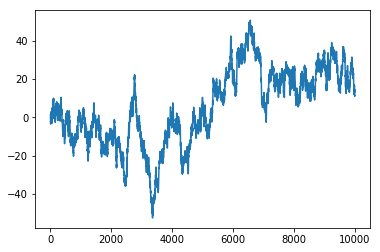

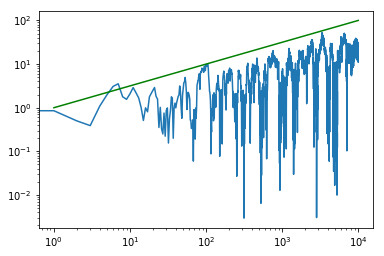

In [41]:
# First generate a random walk and show it
n = 10000
walk = np.cumsum(np.random.randn(n))
plt.plot(walk)
plt.show()

# Now plot the walk on a loglog scale 
plt.loglog(np.abs(walk))
plt.loglog([1,n],[1,np.sqrt(n)], "g-")
plt.show()

We've now made two related plots; it's often useful to make a bunch of plots and group them together in a single figure. This is done with the `figure` and `subplot` functions. The `subplot` is given a numeric argument that defined the number of rows and columns of subplots and the index of the subplot we will proceed to define. It returns a handle to the subplot, that we can use to identify which subplot we want to modify.

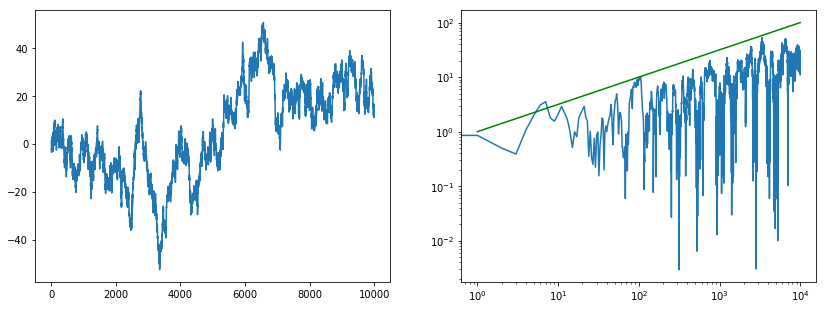

In [42]:
# First generate a random walk and show it

# Create the figure and make it a bit wider
fig = plt.figure(figsize = (14,5))

# Create two subplots
p1a = plt.subplot(121)
p2a = plt.subplot(122)

# Plot the desired graphs in the right subplots
p1a.plot(walk)
p2a.loglog(np.abs(walk))
p2a.loglog([1,n],[1,np.sqrt(n)], "g-")

plt.show()

It's also possible to create a figure with a bunch of subplots all at once, using the `subplots` function.

# Different kinds of plots

PyPlot supports many different kinds of graphs. We've covered line plots and scatter plots, but here is a brief demonstration of some of the most important kinds of graphs:

/Users/jeremydai/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


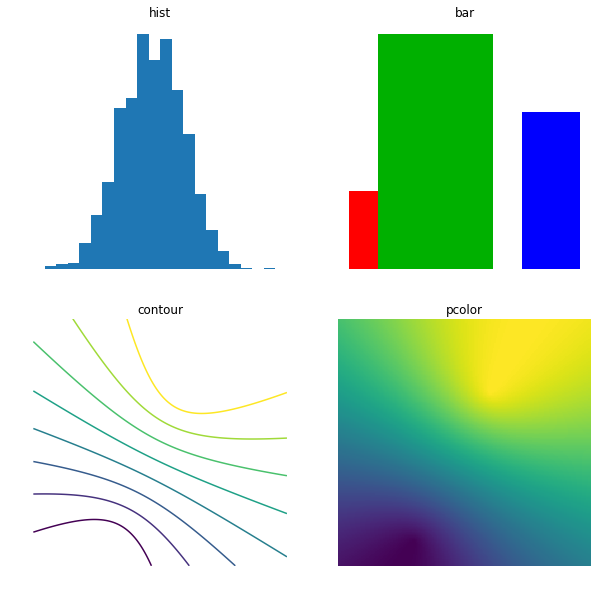

In [43]:
# create a figure and a 2x2 grid of subplots all at once
fig, ax = plt.subplots(2,2,figsize=(10,10))

# make a histogram in top-left position
ax[0][0].hist(np.random.randn(1000), bins=20)
ax[0][0].axis('off')
ax[0][0].set_title("hist")


# make a bar chart in top-right position
ax[0][1].bar(left=[0,1,3], width=[1,2,1], height=[1,3,2], color=['r', '#00b000', 'b'])
ax[0][1].set_title("bar")
ax[0][1].axis('off')

# generate a two dimensional array zs, to demonstrate contour and heatmap plots
def dist(dx, dy):
    return np.sqrt(dx*dx+dy*dy)

ps = 200
zs = np.empty([ps,ps])
for x in range(ps):
    for y in range(ps):
        zs[x,y] = dist(x-.1*ps, y-.3*ps) - dist(x-.7*ps, y-.6*ps)

# generate contour plot
lvl = np.linspace(zs.min(), zs.max(), 10) # 30 levels
ax[1][0].contour(zs, levels=lvl)
ax[1][0].axis('off')
ax[1][0].set_title('contour')

# generate heat map plot
ax[1][1].pcolor(zs)
ax[1][1].axis('off')
ax[1][1].set_title('pcolor')
        
plt.show()


For more information, refer to the documentation:

- [PyPlot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [PyPlot API documentation](https://matplotlib.org/api/pyplot_summary.html)


In [48]:
zs.shape

(200, 200)